<a href="https://colab.research.google.com/github/ACE6233/School/blob/main/handson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hands-on 3
#### The objective of this hands-on is to train a convolutional neural network (CNN) to recognize the handwritten digits (0 - 9).

In [ ]:
pip install gradio

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


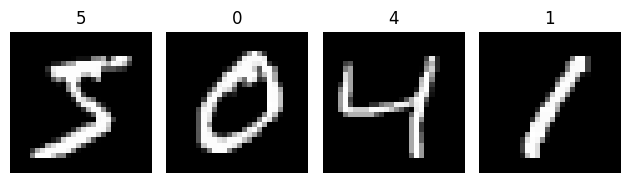

In [ ]:
import numpy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
sp1 = plt.subplot(141)
sp1.axis(False)
sp1.set_title(y_train[0])
sp1.imshow(X_train[0], cmap=plt.get_cmap('gray'))
sp2 = plt.subplot(142)
sp2.axis(False)
sp2.set_title(y_train[1])
sp2.imshow(X_train[1], cmap=plt.get_cmap('gray'))
sp3 = plt.subplot(143)
sp3.axis(False)
sp3.set_title(y_train[2])
sp3.imshow(X_train[2], cmap=plt.get_cmap('gray'))
sp4 = plt.subplot(144)
sp4.axis(False)
sp4.set_title(y_train[3])
sp4.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.tight_layout()
plt.show()

In [ ]:
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# define model for LeNet
# create model
model = Sequential()
model.add(Conv2D(20, (5, 5), padding="same", input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(50, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

# Insert the codes to serialize model to JSON
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.weights.h5")
print("Saved model to disk")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9152 - loss: 0.2781 - val_accuracy: 0.9876 - val_loss: 0.0404
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9887 - loss: 0.0369 - val_accuracy: 0.9854 - val_loss: 0.0437
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9916 - loss: 0.0252 - val_accuracy: 0.9856 - val_loss: 0.0413
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9950 - loss: 0.0169 - val_accuracy: 0.9903 - val_loss: 0.0308
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9965 - loss: 0.0114 - val_accuracy: 0.9925 - val_loss: 0.0283
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy: 0.9918 - val_loss: 0.0296
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9969 - loss: 0.0097 - val_accuracy: 0.9900 - val_loss: 0.0368
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9971 - loss: 0.0085 - val_accuracy: 

Enter an index between 0 and 9999: 109
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
[[8.5172342e-19 3.1589795e-16 1.2422078e-19 2.0905665e-21 1.0000000e+00
  2.8365327e-17 8.6320653e-14 3.1209734e-16 6.7525667e-13 2.8608449e-15]]
Predicted label: 4


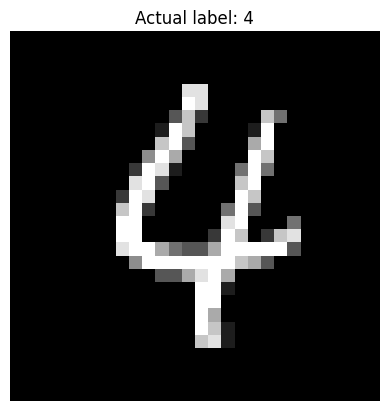

In [ ]:
# Make predition (change index to a number between 0 and 9999)
try:
  index = int(input("Enter an index between 0 and 9999: "))
  assert 0 <= index < 10000, "The index should be between 0 and 9999"
except Exception as e:
  print("Error: ", e)
else:
  res = model.predict(X_test[index].reshape(1, 28, 28, 1))
  print(res)
  print(f'Predicted label: {np.argmax(res)}')

  # Display the test image and show the actual label
  plt.axis(False)
  plt.title(f'Actual label: {y_test[index].argmax()}')
  plt.imshow(X_test[index].reshape(28, 28) * 255, cmap='gray')
  plt.show()

In [ ]:
import gradio as gr
import cv2 # Using OpenCV for image processing
import tensorflow as tf
from tensorflow.keras.models import model_from_json
import os # To check if model files exist

print("TensorFlow Version:", tf.__version__)
print("Gradio Version:", gr.__version__)
print("OpenCV Version:", cv2.__version__)

# --- Configuration ---
MODEL_JSON_PATH = 'model.json'
MODEL_WEIGHTS_PATH = 'model.weights.h5'
INPUT_SHAPE = (28, 28) # Expected input shape for the model (height, width)

# --- Load Model (Do this once outside the prediction function) ---
net = None
model_loaded = False

if os.path.exists(MODEL_JSON_PATH) and os.path.exists(MODEL_WEIGHTS_PATH):
    try:
        # Load model architecture from JSON
        with open(MODEL_JSON_PATH, 'r') as json_file:
            loaded_model_json = json_file.read()
        net = model_from_json(loaded_model_json)

        # Load weights into the model
        net.load_weights(MODEL_WEIGHTS_PATH)

        # Compile the model (often necessary after loading, even if just for prediction)
        # Use standard settings; adjust if your model requires specific ones.
        net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        print("Keras Model loaded successfully from disk.")
        model_loaded = True
        # Optional: Print model summary
        # net.summary()

    except Exception as e:
        print(f"Error loading Keras model: {e}")
        print("Please ensure 'model.json' and 'model.weights.h5' are uploaded correctly.")
else:
    print(f"Error: Model files not found.")
    print(f"Please make sure '{MODEL_JSON_PATH}' and '{MODEL_WEIGHTS_PATH}' exist in the current directory.")

# --- Prediction Function ---
def recognize_digit(image):
    # --- START DEBUGGING PRINTS ---
    print("-" * 20)
    print(f"Received input type: {type(image)}")
    # Limit printing the full value if it's large (like an image array or complex dict)
    if isinstance(image, (dict, np.ndarray)) and image is not None:
         # Try printing keys for dict, shape for array, else snippet
         if isinstance(image, dict):
              print(f"Received input value (dict keys): {image.keys()}")
         elif hasattr(image, 'shape'):
              print(f"Received input value (array shape): {image.shape}")
         else:
              print(f"Received input value: {str(image)[:100]}...") # Print snippet
    else:
         print(f"Received input value: {image}") # Print simple types directly
    print("-" * 20)
    # --- END DEBUGGING PRINTS ---

    # Handle None case FIRST
    if image is None:
        print("Input image is None, returning.")
        return "Please draw a digit.", None

    # --- Check if it's a dictionary and try to extract 'composite' image ---
    if isinstance(image, dict):
        print("Input is a dictionary. Keys:", image.keys())
        # --- Updated Logic: Check for 'composite' key ---
        if 'composite' in image and isinstance(image['composite'], np.ndarray):
            print("Found 'composite' key with numpy array, using it.")
            image = image['composite'] # Extract the composite image array
        else:
            # If 'composite' key doesn't exist or isn't a numpy array
            print("Error: Input is a dictionary but cannot find valid 'composite' image data.")
            # Print types of dictionary values for more detail if needed
            for key in image:
                 if image[key] is not None:
                      print(f"  Key '{key}' type: {type(image[key])}, Shape/Len: {getattr(image[key], 'shape', len(getattr(image[key], '__dict__', image[key])))}")
                 else:
                      print(f"  Key '{key}' type: None")
            return "Error: Unexpected dictionary format from Sketchpad.", None
    # --- End of dictionary handling ---

    # --- Defensive Check for shape attribute ---
    # Now, 'image' should be a NumPy array (either originally or extracted)
    if not hasattr(image, 'shape'):
         print(f"Error: Input STILL does not have 'shape' after processing. Type is {type(image)}")
         return "Error: Unexpected input format after processing.", None

    # Check image dimensions and convert to grayscale if necessary
    print(f"Processing image with shape: {image.shape}")
    if len(image.shape) == 2: # Grayscale already
        gray_image = image
        print("Image is grayscale.")
    elif len(image.shape) == 3 and image.shape[2] == 4: # RGBA
        # Sketchpad composite might be RGBA
        print("Image is RGBA, converting to grayscale.")
        # Convert RGBA to Grayscale - handle transparency appropriately if needed
        # A simple approach is to convert to RGB first, then Gray
        # Or directly, ensuring background color handling if alpha is used
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY) # OpenCV handles RGBA->Gray
    elif len(image.shape) == 3 and image.shape[2] == 3: # RGB
        print("Image is RGB, converting to grayscale.")
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        print(f"Error: Input image has unexpected shape: {image.shape}")
        return "Error: Invalid image dimensions.", None

    # Ensure manual inversion is still present if needed (white-on-black)
    print("Inverting image colors (assuming white on black needed).")
    gray_image = 255 - gray_image

    # Optional: Apply thresholding
    print("Applying threshold.")
    _, processed_image = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY)

    # Resize to the target input size
    print(f"Resizing image to {INPUT_SHAPE}.")
    processed_image = cv2.resize(processed_image, INPUT_SHAPE, interpolation=cv2.INTER_AREA)

    # Reshape and Normalize
    print("Reshaping and normalizing for model.")
    blob = processed_image.reshape(1, INPUT_SHAPE[0], INPUT_SHAPE[1], 1).astype('float32')
    blob /= 255.0

    # Make Prediction
    print("Making prediction.")
    try:
        predictions = net.predict(blob)
    except Exception as e:
        print(f"Error during prediction: {e}")
        return f"Prediction error: {e}", processed_image # Return error and processed image

    # Format Output
    print("Formatting predictions.")
    confidences = {str(i): float(predictions[0][i]) for i in range(len(predictions[0]))}

    print("Returning results.")
    return confidences, processed_image

# --- Create Gradio Interface ---
if model_loaded:
# Define Input and Output Components
    input_sketchpad = gr.Sketchpad(
        label="Draw a Digit (0-9)",
        image_mode='L'
    )

    output_label = gr.Label(
        num_top_classes=3,
        label="Predictions"
    )

    # Corrected gr.Image definition
    output_processed_image = gr.Image(
        label="Processed Input (28x28)",
        # shape=(INPUT_SHAPE[1], INPUT_SHAPE[0]), # This caused the error
        width=INPUT_SHAPE[1],  # Set width explicitly (should be 28)
        height=INPUT_SHAPE[0], # Set height explicitly (should be 28)
        image_mode='L'         # Keep image mode as grayscale
    )

    # Create the Interface
    iface = gr.Interface(
        fn=recognize_digit,
        inputs=input_sketchpad,
        outputs=[output_label, output_processed_image], # List of outputs
        live=False,
        title="Handwritten Digit Recognizer",
        description="Draw a single digit (0-9) in the box below. The model will predict the digit in real-time. Ensure the model files ('model.json', 'model.weights.h5') are uploaded."
    )

    # Launch the Interface (share=True provides a public link for Colab)
    iface.launch(share=True, debug=True) # debug=True can help troubleshoot

else:
    print("\n--- Gradio Interface cannot start because the model failed to load. ---")
    print("Please check the file paths and ensure the model files are correct and uploaded.")


TensorFlow Version: 2.19.0
Gradio Version: 5.44.1
OpenCV Version: 4.12.0
Keras Model loaded successfully from disk.
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ac4bad285e79a19551.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


--------------------
Received input type: <class 'dict'>
Received input value (dict keys): dict_keys(['background', 'layers', 'composite'])
--------------------
Input is a dictionary. Keys: dict_keys(['background', 'layers', 'composite'])
Found 'composite' key with numpy array, using it.
Processing image with shape: (800, 800)
Image is grayscale.
Inverting image colors (assuming white on black needed).
Applying threshold.
Resizing image to (28, 28).
Reshaping and normalizing for model.
Making prediction.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
Formatting predictions.
Returning results.
